In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction

# Load in the necessary data

## The model results summaries

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
selected_feat_dir = os.path.join(datadir, 's_models', 'selected_features_constHP')
results_df = pd.read_csv(os.path.join(selected_feat_dir, 'all.stat.results.csv'))
results_allfeats_df = pd.read_csv(os.path.join(datadir, 's_models','all_features_constHP', 'all.stat.results.csv'))

In [3]:
results_df.head()

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.961,0.113,0.957,0.122,0.961,0.105,YHB,S
1,0.945,0.135,0.959,0.130,0.922,0.146,YHL,S
2,0.954,0.117,0.948,0.126,0.949,0.130,YMR,S
3,0.914,0.134,0.878,0.162,0.877,0.148,YHH,S
4,0.942,0.133,0.927,0.165,NaN,NaN,B207,S


## The example counts

In [4]:
## READ IN DF FOR COUNTS ##
split_cnts = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.station.ex.counts.csv'))
df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.20230101.csv'))
split_cnts.head()

,station,cnt_train,cnt_test,cnt_holdout
0,YNR,2090.0,541.0,99.0
1,YMR,1533.0,392.0,172.0
2,YMC,1443.0,363.0,171.0
3,YHB,1248.0,331.0,225.0
4,YHH,1222.0,328.0,113.0


## The model predictions

In [5]:
all_stats = results_df['station']
train_preds_df = combine_prediction_files(all_stats, selected_feat_dir,'S', 'train')
test_preds_df = combine_prediction_files(all_stats, selected_feat_dir,'S', 'test')
train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.736525,YHB
1,60001367,2.155231,2.054870,YHB
2,60001437,2.543478,2.464974,YHB
3,60001517,2.080642,2.161423,YHB
4,60001572,1.630087,1.707947,YHB
...,...,...,...,...
239,60516997,0.857505,1.144656,YDD
240,60518152,0.756163,0.976055,YDD
241,60519152,1.920408,1.820101,YDD
242,60521912,0.755231,1.019222,YDD


In [6]:
holdout_preds_df = combine_prediction_files(df_2023['station'].unique(), selected_feat_dir,'S', 'holdout')
holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.244881,YMC
1,60529052,1.338398,1.136641,YMC
2,60529562,0.843194,0.690048,YMC
3,60529752,1.289612,1.172708,YMC
4,60529762,0.986834,1.064607,YMC
...,...,...,...,...
7,60553712,1.861026,1.889634,FLWY
8,60553732,2.405604,2.367266,FLWY
9,60554092,1.788850,1.968501,FLWY
10,60554577,1.558406,1.714286,FLWY


In [7]:
# Filter split counts to only stats with models
split_cnts = split_cnts[split_cnts['station'].isin(all_stats)]

# Look at the scores from various splits

In [8]:
results_df['train_r2'].describe()

count    18.000000
mean      0.937500
std       0.030807
min       0.857000
25%       0.929500
50%       0.948000
75%       0.956750
max       0.964000
Name: train_r2, dtype: float64

In [9]:
results_df['test_r2'].describe()

count    18.000000
mean      0.900000
std       0.050397
min       0.816000
25%       0.849250
50%       0.915500
75%       0.943000
max       0.959000
Name: test_r2, dtype: float64

In [10]:
results_df['holdout_r2'].describe()

count    15.000000
mean      0.762533
std       0.487932
min      -0.982000
25%       0.861500
50%       0.902000
75%       0.927500
max       0.961000
Name: holdout_r2, dtype: float64

In [11]:
(test_preds_df['magnitude'] - test_preds_df['predicted_magnitude']).describe()

count    3327.000000
mean        0.014618
std         0.146297
min        -1.164127
25%        -0.067149
50%         0.013814
75%         0.097744
max         0.952185
dtype: float64

In [12]:
(holdout_preds_df['magnitude'] - holdout_preds_df['predicted_magnitude']).describe()

count    1185.000000
mean        0.006745
std         0.149724
min        -0.467384
25%        -0.081243
50%         0.002554
75%         0.096786
max         1.235317
dtype: float64

# Make tables/heatmaps to compare the scores

In [13]:
plotting.set_default_fontsizes(MEDIUM_SIZE=8)

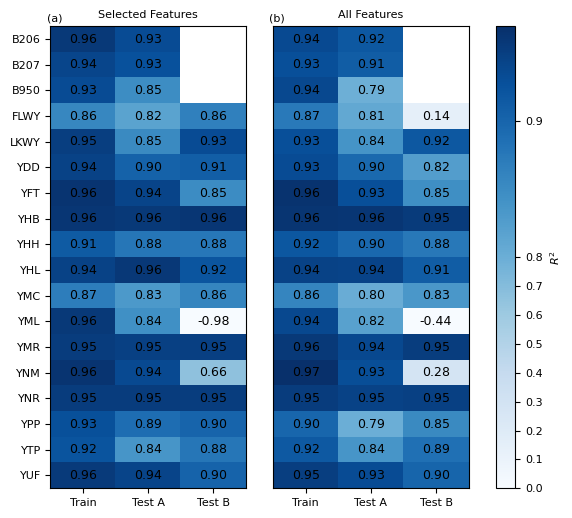

In [14]:
fig, axes = plt.subplots(1, 3, width_ratios=[2, 2, 0.2], figsize=(6, 6))

midpoint_normalize = True
midpoint = 0.8
cmap_min = 0
cmap_max = 0.97
xlabels=['Train', 'Test A', 'Test B']

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Selected Features',
                        ax=axes[0],
                        show_ylabels=True,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
im2 = plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='All Features',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
plt.colorbar(im2, cax=axes[2], label=f'$R^2$', ticks=np.arange(0, 1.0, 0.1))

sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes[:-1]):
    ax.text(-0.02, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=8)
    
#fig.tight_layout()
fig.show()

cmap min set to 2.0
cmap max set to 2090.0
cmap midpoint set to 172.0
cmap min set to -0.5389999999999999
cmap max set to 0.727


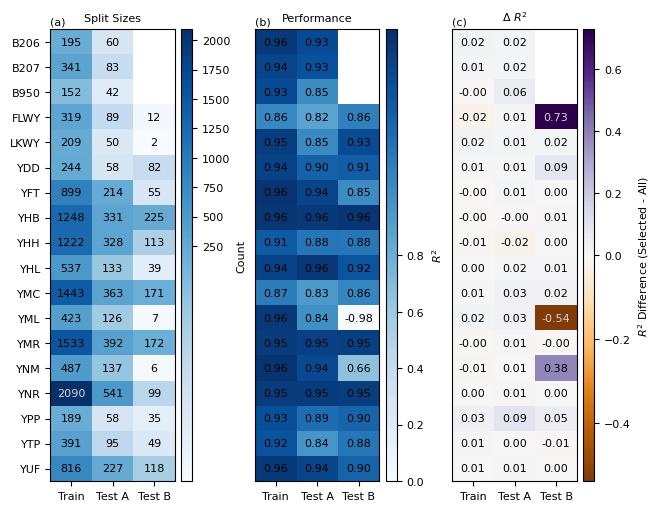

In [15]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']
fig, axes = plt.subplots(1, 3, figsize=(6.5, 5), constrained_layout=True) #, width_ratios=[2, 2, 0.2], figsize=(6, 6))

im1 = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        ax=axes[0],
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=midpoint_normalize,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=8,
                        tight_layout=True,
                        tablevalueprec=0,
                        fontcolorthresh=0.90,
                        alttablefontcolor='lightgray'
                        )

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Performance',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=True,
                        xticklabels=xlabels,
                        tablefontsize=8,
                        cbar_label=f'$R^2$')

im3 = plotting.scores_heatmap(diff_df,
                             ax = axes[2],
                            midpoint_normalize=True,
                            midpoint=0,
                            cmap_max = None,
                            cmap_min = None,
                            title='$\Delta$ $R^2$',
                            show_ylabels=False,
                            show_cbar=True,
                            xticklabels=xlabels,
                            cbar_label=f'$R^2$ Difference (Selected - All)',
                            cmap=cm.PuOr,
                            tablefontcolor='k',
                            tablefontsize=8,
                            tight_layout=True,
                            fontcolorthresh=0.90,
                            alttablefontcolor='lightgray'
                            )

sp_labels = ['(a)', '(b)', '(c)']
sp_label_x = [ 0,0, 0]
for i, ax in enumerate(axes):
    ax.text(sp_label_x[i], 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=8)
    
fig.savefig('../figures/model_summary_heatmap_S.jpg', dpi=300)
#fig.tight_layout()

cmap min set to 2.0
cmap max set to 2090.0
cmap min set to -0.5389999999999999
cmap max set to 0.727


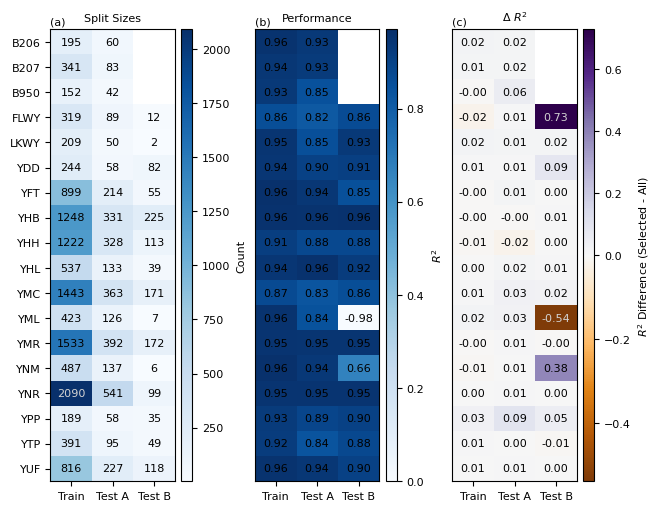

In [16]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']
fig, axes = plt.subplots(1, 3, figsize=(6.5, 5), constrained_layout=True) #, width_ratios=[2, 2, 0.2], figsize=(6, 6))

im1 = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        ax=axes[0],
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=False,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=8,
                        tight_layout=True,
                        tablevalueprec=0,
                        fontcolorthresh=0.90,
                        alttablefontcolor='lightgray'
                        )

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=False,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Performance',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=True,
                        xticklabels=xlabels,
                        tablefontsize=8,
                        cbar_label=f'$R^2$')

im3 = plotting.scores_heatmap(diff_df,
                             ax = axes[2],
                            midpoint_normalize=True,
                            midpoint=0,
                            cmap_max = None,
                            cmap_min = None,
                            title='$\Delta$ $R^2$',
                            show_ylabels=False,
                            show_cbar=True,
                            xticklabels=xlabels,
                            cbar_label=f'$R^2$ Difference (Selected - All)',
                            cmap=cm.PuOr,
                            tablefontcolor='k',
                            tablefontsize=8,
                            tight_layout=True,
                            fontcolorthresh=0.90,
                            alttablefontcolor='lightgray'
                            )

sp_labels = ['(a)', '(b)', '(c)']
sp_label_x = [ 0,0, 0]
for i, ax in enumerate(axes):
    ax.text(sp_label_x[i], 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=8)

fig.savefig('../figures/model_summary_heatmap_S_linear.jpg', dpi=300)
#fig.tight_layout()

# Actual vs predicted plots

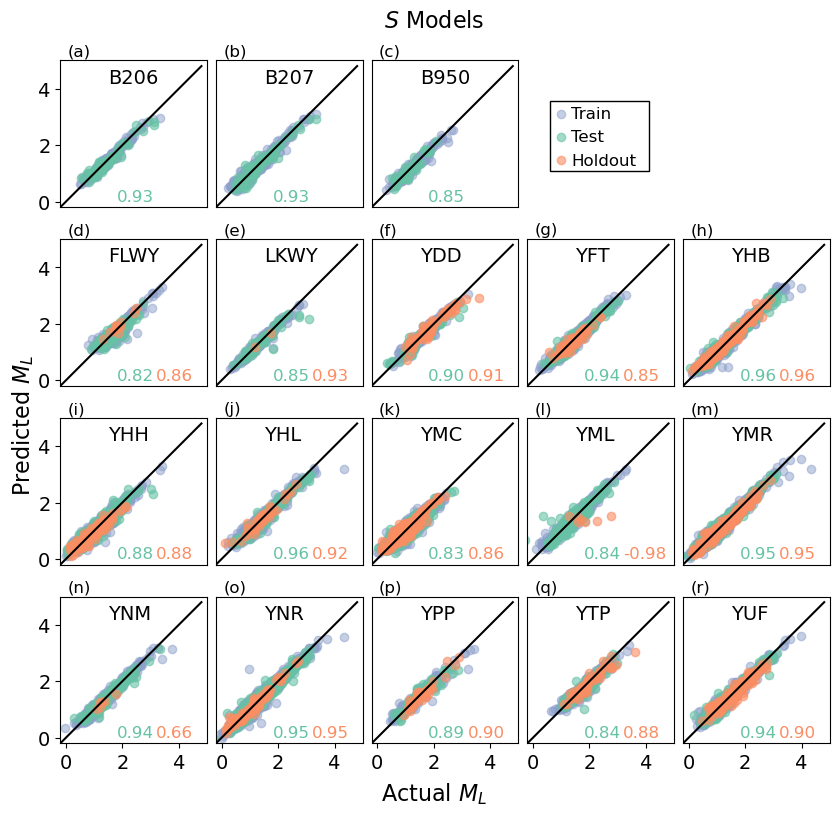

In [40]:
plotting.actual_v_predicted(results_df,
                     train_preds_df, 
                     test_preds_df,
                     holdout_preds_df,
                     inner_ticks_on=False,
                     title='$\it S$ Models',
                     figsize=(8, 7.7),
                     colors=['#8da0cb', '#66c2a5', '#fc8d62'],
                     alphas=[0.5, 0.6, 0.6],
                     linestyle='-',
                     n_cols=5,
                     legend_bbox_width=3.5,
                     savepath="../figures/actual_v_predicted_S.png")

In [18]:
diff_df[['train_r2', 'test_r2', 'holdout_r2']].quantile()

train_r2      0.0025
test_r2       0.0120
holdout_r2    0.0060
Name: 0.5, dtype: float64

# Average the predictions

In [19]:
test_avg_df = compute_network_avg_prediction(test_preds_df)
holdout_avg_df = compute_network_avg_prediction(holdout_preds_df)

In [20]:
(test_avg_df['magnitude'] - test_avg_df['predicted_magnitude']).describe()

count    1312.000000
mean        0.008204
std         0.121323
min        -0.663712
25%        -0.055184
50%         0.010161
75%         0.078378
max         0.739227
dtype: float64

In [21]:
(holdout_avg_df['magnitude'] - holdout_avg_df['predicted_magnitude']).describe()

count    436.000000
mean       0.004052
std        0.120259
min       -0.467384
25%       -0.064872
50%        0.001522
75%        0.075659
max        0.643261
dtype: float64

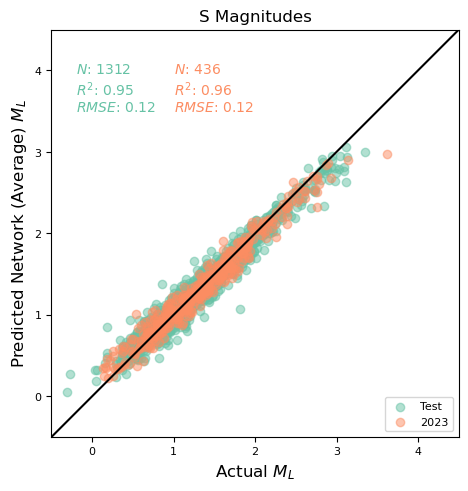

In [22]:
plotting.actual_v_network_avg_prediction([test_avg_df, holdout_avg_df],
                                    title='S Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2023'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [23]:
train_preds_df.iloc[train_preds_df['magnitude'].argmax()]

Evid                   60203137
magnitude              4.326333
predicted_magnitude    3.200971
station                     YHL
Name: 96, dtype: object

In [24]:
holdout_preds_df.iloc[holdout_preds_df['magnitude'].argmax()]

Evid                   60535541
magnitude              3.615056
predicted_magnitude    2.907741
station                     YDD
Name: 22, dtype: object

In [25]:
test_preds_df.iloc[test_preds_df['magnitude'].argmax()]

Evid                   60045887
magnitude              3.344134
predicted_magnitude    2.897736
station                     YHB
Name: 35, dtype: object

# Average predictions when using all features

In [26]:
diff_df['train_r2'].describe()[['50%', 'std']]

50%    0.002500
std    0.011927
Name: train_r2, dtype: float64

In [27]:
diff_df['test_r2'].describe()[['50%', 'std']]

50%    0.012000
std    0.024541
Name: test_r2, dtype: float64

In [28]:
diff_df['holdout_r2'].describe()[['50%', 'std']]

50%    0.006000
std    0.258783
Name: holdout_r2, dtype: float64

In [29]:
results_allfeats_df['train_r2'].describe()[['min', 'max', '50%']]

min    0.8580
max    0.9690
50%    0.9365
Name: train_r2, dtype: float64

In [30]:
results_allfeats_df['test_r2'].describe()[['min', 'max', '50%']]

min    0.7920
max    0.9610
50%    0.9035
Name: test_r2, dtype: float64

In [31]:
results_allfeats_df['holdout_r2'].describe()[['min', 'max', '50%']]

min   -0.443
max    0.955
50%    0.875
Name: holdout_r2, dtype: float64

In [32]:
all_stats = results_df['station']
pred_path = os.path.join(datadir,'s_models', 'all_features')
train_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'S', 'train')
test_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'S', 'test')
holdout_preds_allfeat_df = combine_prediction_files(df_2023['station'].unique(), pred_path,'S', 'holdout')


In [33]:
(test_preds_allfeat_df['magnitude'] - test_preds_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.012304
std    0.163915
dtype: float64

In [34]:
(holdout_preds_allfeat_df['magnitude'] - holdout_preds_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.007343
std    0.167052
dtype: float64

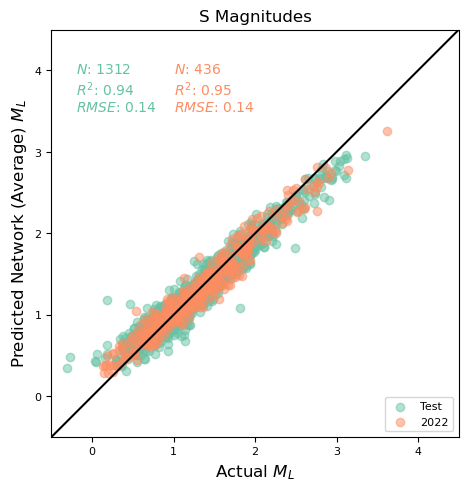

In [35]:
test_avg_allfeat_df = compute_network_avg_prediction(test_preds_allfeat_df)
holdout_avg_allfeat_df = compute_network_avg_prediction(holdout_preds_allfeat_df)
plotting.actual_v_network_avg_prediction([test_avg_allfeat_df, holdout_avg_allfeat_df],
                                    title='S Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [36]:
(test_avg_allfeat_df['magnitude'] - test_avg_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.012434
std    0.139670
dtype: float64

In [37]:
(holdout_avg_allfeat_df['magnitude'] - holdout_avg_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.008867
std    0.138281
dtype: float64

(-1.1, 1.1)

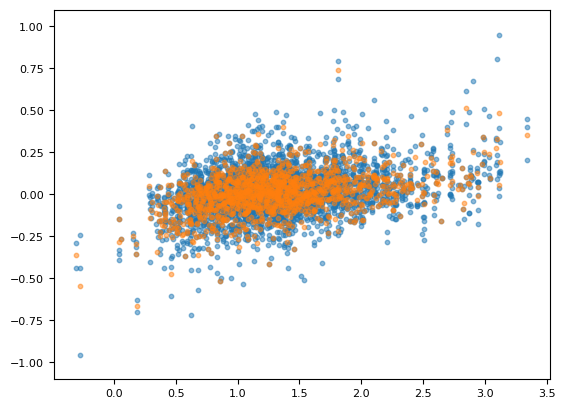

In [38]:
plt.scatter(test_preds_df['magnitude'], 
            test_preds_df['magnitude'] - test_preds_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.scatter(test_avg_df['magnitude'], 
            test_avg_df['magnitude'] - test_avg_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.ylim([-1.1, 1.1])

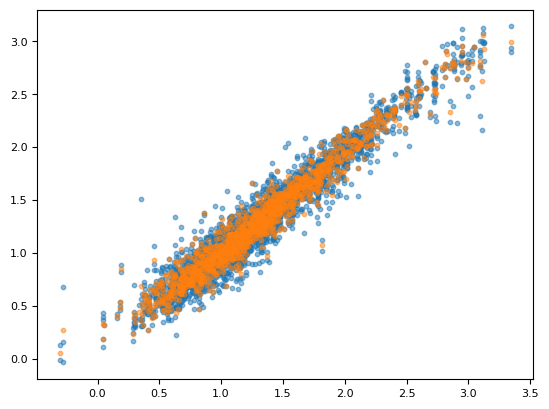

In [39]:
plt.scatter(test_preds_df['magnitude'], 
            test_preds_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.scatter(test_avg_df['magnitude'], 
            test_avg_df['predicted_magnitude'],
            alpha=0.5,
            s=10)